In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sanskrit-text/Sanskrit_Text-5.jpg
/kaggle/input/sanskrit-text/Sanskrit_Text-3.jpg
/kaggle/input/sanskrit-text/Sanskrit_Text-1.jpg
/kaggle/input/sanskrit-text/Sanskrit_Text-4.jpg
/kaggle/input/sanskrit-text/Sanskrit_Text-2.jpg


In [19]:
cd ../input/sanskrit-text

/kaggle/input/sanskrit-text


In [23]:
#function for detecting boxes for each word or letter
import cv2
def rectangle_box(string):
 img = cv2.imread(string)
 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
 
 ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
 rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
 
 dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
 
 contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
 												cv2.CHAIN_APPROX_NONE)
 
 l1=[]
 print(type(contours))
 for cnt in contours:
 	x, y, w, h = cv2.boundingRect(cnt)
 	l1.append([x,y,x+w,y+h])
 return l1

In [11]:
mkdir ../../working/output_final

<class 'list'>


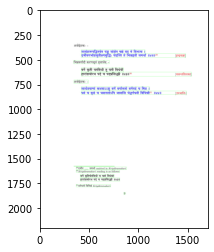

<class 'list'>


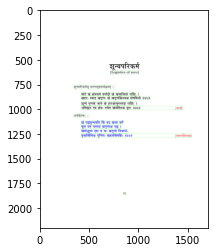

<class 'list'>


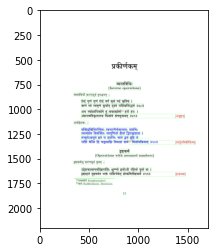

<class 'list'>


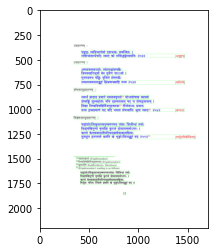

<class 'list'>


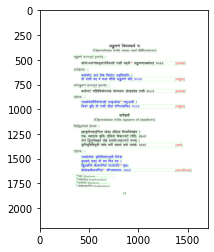

In [24]:
#merging boxes lying on the same line
import json
for i in range(1,6):
 img='Sanskrit_Text-'+str(i)+'.jpg'
 temp= rectangle_box(img)
 count=0
 q=cv2.imread(img)
 h,w,c= q.shape
 while(temp!=[]):
    use =temp[0]
    x1= int(use[0])
    x2= int(use[2])
    y1 = use[1]
    y2=  use[3]
    while(len(temp)>=2):
      use2=temp[1]
      if(int(use2[1])-25<=int(use[1])<=int(use2[1])+25 or int(use2[3])-25<=int(use[3])<=int(use2[3])+25):
        x1= min(int(use2[0]),x1)
        x2= max(x2,int(use2[2]))
        y1=min(use[1],use2[1])
        y2=max(use[3],use2[3])
        temp.pop(1)
        continue
      count+=1
      cv2.rectangle(q, (x1,y1), (x2,y2), (0, 255, 0), 1)
      data = {'page'+str(i)+'box'+str(count):{'top_left': [x1,y1], 'top_right': [x2,y1], 'bottom_left': [x1,y2], 'bottom_right': [x2,y2]}}

      

      json_object = json.dumps(data, indent = 4)
      

      with open("../../working/output.json", "a") as outfile:
        outfile.write(json_object)
      img2=q[y1:y2,x1:x2]
      cv2.imwrite('../../working/output_final/page:'+str(i)+'box'+str(count)+'.jpg',img2)
      break
    temp.pop(0)
    
 import matplotlib.pyplot as plt
 plt.imshow(q)
 plt.show()
 cv2.imwrite('../../working/page'+str(i)+'.jpg',q)

In [14]:
cd ../../working

/kaggle/working


In [16]:
!zip output_final.zip -r output_final

  adding: output_final/ (stored 0%)
  adding: output_final/page:4box17.jpg (deflated 8%)
  adding: output_final/page:2box7.jpg (deflated 19%)
  adding: output_final/page:5box15.jpg (deflated 8%)
  adding: output_final/page:5box28.jpg (deflated 9%)
  adding: output_final/page:5box4.jpg (deflated 11%)
  adding: output_final/page:1box8.jpg (deflated 5%)
  adding: output_final/page:5box7.jpg (deflated 4%)
  adding: output_final/page:4box12.jpg (deflated 4%)
  adding: output_final/page:1box14.jpg (deflated 6%)
  adding: output_final/page:1box5.jpg (deflated 11%)
  adding: output_final/page:5box12.jpg (deflated 10%)
  adding: output_final/page:3box9.jpg (deflated 8%)
  adding: output_final/page:4box9.jpg (deflated 8%)
  adding: output_final/page:4box15.jpg (deflated 5%)
  adding: output_final/page:3box23.jpg (deflated 8%)
  adding: output_final/page:3box16.jpg (deflated 16%)
  adding: output_final/page:2box9.jpg (deflated 10%)
  adding: output_final/page:4box8.jpg (deflated 8%)
  adding: out